In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('~/Documents/Sem 6/ML/Exercise 2/house_pred.csv')
test = pd.read_csv('~/Documents/Sem 6/ML/Exercise 2/test.csv')

In [2]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1205,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal
1,1206,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1207,20,RH,NaN,8900,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal
3,1208,20,RL,70.0,9135,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
4,1209,20,RL,70.0,7763,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
for column in data.columns:
    print(data[column].value_counts().head())
for column in test.columns:
    print(test[column].value_counts().head())

Id
1460    1
1       1
2       1
3       1
4       1
Name: count, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
Name: count, dtype: int64
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
LotFrontage
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: count, dtype: int64
LotArea
7200     25
9600     24
6000     17
10800    14
8400     14
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dty

In [7]:
data[data.columns[data.isnull().any()]].isnull().sum()* 100 / data.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [8]:
test[test.columns[test.isnull().any()]].isnull().sum()* 100 / test.shape[0]

LotFrontage     19.140625
Alley           93.750000
MasVnrType      59.375000
MasVnrArea       0.781250
BsmtQual         1.953125
BsmtCond         1.953125
BsmtExposure     1.953125
BsmtFinType1     1.953125
BsmtFinType2     1.953125
Electrical       0.390625
FireplaceQu     48.437500
GarageType       5.468750
GarageYrBlt      5.468750
GarageFinish     5.468750
GarageQual       5.468750
GarageCond       5.468750
PoolQC          98.828125
Fence           78.906250
MiscFeature     97.656250
dtype: float64

In [9]:
data = data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
test = test.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [10]:
object_columns_data = data.select_dtypes(include=['object'])
numerical_columns_data =data.select_dtypes(exclude=['object'])

object_columns_test = test.select_dtypes(include=['object'])
numerical_columns_test =test.select_dtypes(exclude=['object'])

In [11]:
null_counts = object_columns_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

null_countst = object_columns_test.isnull().sum()
print("Number of null values in each column:\n{}".format(null_countst))

Number of null values in each column:
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64
Number of null values in each column:
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilitie

In [12]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']

object_columns_data[columns_None]= object_columns_data[columns_None].fillna('None')

columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']

object_columns_test[columns_None]= object_columns_test[columns_None].fillna('None')

In [13]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']

#fill missing values for each column (using its own most frequent value)
object_columns_data[columns_with_lowNA] = object_columns_data[columns_with_lowNA].fillna(object_columns_data.mode().iloc[0])

columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']

#fill missing values for each column (using its own most frequent value)
object_columns_test[columns_with_lowNA] = object_columns_test[columns_with_lowNA].fillna(object_columns_test.mode().iloc[0])

In [14]:
#Number of null values in each feature
null_counts = numerical_columns_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

#Number of null values in each feature
null_countst = numerical_columns_test.isnull().sum()
print("Number of null values in each column:\n{}".format(null_countst))

Number of null values in each column:
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
Number of null values in each column:
Id                0
MSSubClass        0
LotFrontage      49
LotArea           0
OverallQual       0
OverallCond  

In [15]:
print(numerical_columns_data["LotFrontage"].median())

print((numerical_columns_data['YrSold'] - numerical_columns_data['YearBuilt']).median())

print(numerical_columns_test["LotFrontage"].median())

print((numerical_columns_test['YrSold'] - numerical_columns_data['YearBuilt']).median())

69.0
35.0
66.0
35.0


In [16]:
numerical_columns_data['LotFrontage'] = numerical_columns_data['LotFrontage'].fillna(69)

numerical_columns_data['GarageYrBlt'] = numerical_columns_data['GarageYrBlt'].fillna(numerical_columns_data['YrSold']-35)

numerical_columns_test['LotFrontage'] = numerical_columns_test['LotFrontage'].fillna(66)

numerical_columns_test['GarageYrBlt'] = numerical_columns_test['GarageYrBlt'].fillna(numerical_columns_data['YrSold']-35)

In [17]:
numerical_columns_data= numerical_columns_data.fillna(0)

numerical_columns_test= numerical_columns_test.fillna(0)

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

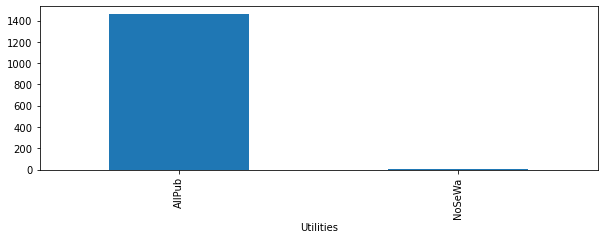

In [18]:
object_columns_data['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_data['Utilities'].value_counts() 

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

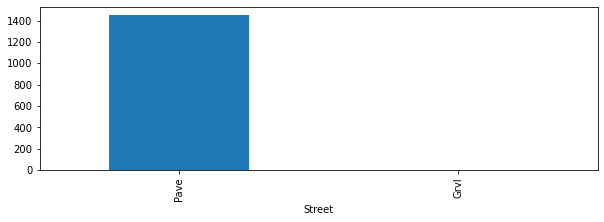

In [19]:
object_columns_data['Street'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_data['Street'].value_counts() 

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

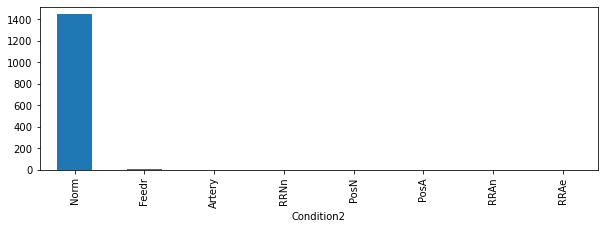

In [20]:
object_columns_data['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_data['Condition2'].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

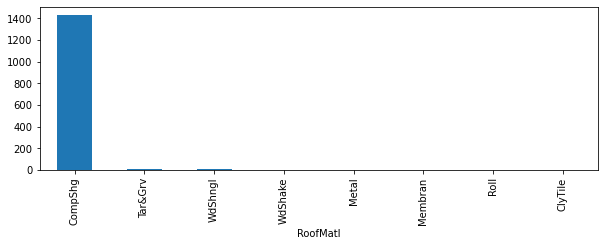

In [21]:
object_columns_data['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_data['RoofMatl'].value_counts() 

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

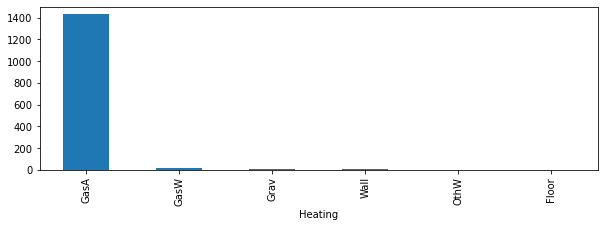

In [22]:
object_columns_data['Heating'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_data['Heating'].value_counts() #======> Drop feature one Type

In [23]:
object_columns_data = object_columns_data.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [24]:
numerical_columns_data['Age_House']= (numerical_columns_data['YrSold']-numerical_columns_data['YearBuilt'])
numerical_columns_data['Age_House'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age_House, dtype: float64

In [25]:
numerical_columns_test['Age_House']= (numerical_columns_test['YrSold']-numerical_columns_test['YearBuilt'])
numerical_columns_test['Age_House'].describe()

count    256.000000
mean      36.984375
std       31.185966
min        0.000000
25%        6.000000
50%       36.000000
75%       57.250000
max      136.000000
Name: Age_House, dtype: float64

In [26]:
Negatif = numerical_columns_data[numerical_columns_data['Age_House'] < 0]
Negatif

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House


In [27]:
Negatift = numerical_columns_test[numerical_columns_test['Age_House'] < 0]
Negatift

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House


In [28]:
numerical_columns_data.loc[numerical_columns_data['YrSold'] < numerical_columns_data['YearBuilt'],'YrSold' ] = 2009
numerical_columns_data['Age_House']= (numerical_columns_data['YrSold']-numerical_columns_data['YearBuilt'])
numerical_columns_data['Age_House'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age_House, dtype: float64

In [29]:
numerical_columns_test.loc[numerical_columns_test['YrSold'] < numerical_columns_test['YearBuilt'],'YrSold' ] = 2009
numerical_columns_test['Age_House']= (numerical_columns_test['YrSold']-numerical_columns_test['YearBuilt'])
numerical_columns_test['Age_House'].describe()

count    256.000000
mean      36.984375
std       31.185966
min        0.000000
25%        6.000000
50%       36.000000
75%       57.250000
max      136.000000
Name: Age_House, dtype: float64

In [30]:
numerical_columns_data['TotalSA']=numerical_columns_data['TotalBsmtSF'] + numerical_columns_data['1stFlrSF'] + numerical_columns_data['2ndFlrSF']
numerical_columns_test['TotalSA']=numerical_columns_test['TotalBsmtSF'] + numerical_columns_test['1stFlrSF'] + numerical_columns_test['2ndFlrSF']

In [31]:
numerical_columns_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House,TotalSA
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,2,2008,208500,5,2566
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,5,2007,181500,31,2524
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,9,2008,223500,7,2706
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,272,0,0,0,0,2,2006,140000,91,2473
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,12,2008,250000,8,3343


In [32]:
numerical_columns_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalSA
0,1205,20,78.0,10140,5,6,1975,1975,0.0,788,...,88,0,0,0,0,0,7,2006,31,2130
1,1206,20,90.0,14684,7,7,1990,1991,234.0,485,...,70,0,0,0,0,0,6,2009,19,4354
2,1207,20,66.0,8900,4,4,1966,1966,0.0,1056,...,42,0,0,0,0,0,11,2006,40,2112
3,1208,20,70.0,9135,6,5,2003,2003,120.0,340,...,23,0,0,0,0,0,5,2006,3,3382
4,1209,20,70.0,7763,5,7,1962,1980,0.0,504,...,0,0,0,0,0,0,10,2008,46,2214


In [33]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_data['ExterQual'] = object_columns_data['ExterQual'].map(bin_map)
object_columns_data['ExterCond'] = object_columns_data['ExterCond'].map(bin_map)
object_columns_data['BsmtCond'] = object_columns_data['BsmtCond'].map(bin_map)
object_columns_data['BsmtQual'] = object_columns_data['BsmtQual'].map(bin_map)
object_columns_data['HeatingQC'] = object_columns_data['HeatingQC'].map(bin_map)
object_columns_data['KitchenQual'] = object_columns_data['KitchenQual'].map(bin_map)
object_columns_data['FireplaceQu'] = object_columns_data['FireplaceQu'].map(bin_map)
object_columns_data['GarageQual'] = object_columns_data['GarageQual'].map(bin_map)
object_columns_data['GarageCond'] = object_columns_data['GarageCond'].map(bin_map)
object_columns_data['CentralAir'] = object_columns_data['CentralAir'].map(bin_map)
object_columns_data['LotShape'] = object_columns_data['LotShape'].map(bin_map)
object_columns_data['BsmtExposure'] = object_columns_data['BsmtExposure'].map(bin_map)
object_columns_data['BsmtFinType1'] = object_columns_data['BsmtFinType1'].map(bin_map)
object_columns_data['BsmtFinType2'] = object_columns_data['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_data['PavedDrive'] = object_columns_data['PavedDrive'].map(PavedDrive)

object_columns_data

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,3,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,4,Typ,0,Attchd,RFn,2,2,2,WD,Normal
1,RL,3,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,2,Typ,2,Attchd,RFn,2,2,2,WD,Normal
2,RL,2,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,4,Typ,2,Attchd,RFn,2,2,2,WD,Normal
3,RL,2,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,4,Typ,4,Detchd,Unf,2,2,2,WD,Abnorml
4,RL,2,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,4,Typ,2,Attchd,RFn,2,2,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,3,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,Gable,...,2,Typ,2,Attchd,RFn,2,2,2,WD,Normal
1456,RL,3,Lvl,Inside,Gtl,NWAmes,Norm,1Fam,1Story,Gable,...,2,Min1,2,Attchd,Unf,2,2,2,WD,Normal
1457,RL,3,Lvl,Inside,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,4,Typ,4,Attchd,RFn,2,2,2,WD,Normal
1458,RL,3,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,Hip,...,4,Typ,0,Attchd,Unf,2,2,2,WD,Normal


In [34]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_test['ExterQual'] = object_columns_test['ExterQual'].map(bin_map)
object_columns_test['ExterCond'] = object_columns_test['ExterCond'].map(bin_map)
object_columns_test['BsmtCond'] = object_columns_test['BsmtCond'].map(bin_map)
object_columns_test['BsmtQual'] = object_columns_test['BsmtQual'].map(bin_map)
object_columns_test['HeatingQC'] = object_columns_test['HeatingQC'].map(bin_map)
object_columns_test['KitchenQual'] = object_columns_test['KitchenQual'].map(bin_map)
object_columns_test['FireplaceQu'] = object_columns_test['FireplaceQu'].map(bin_map)
object_columns_test['GarageQual'] = object_columns_test['GarageQual'].map(bin_map)
object_columns_test['GarageCond'] = object_columns_test['GarageCond'].map(bin_map)
object_columns_test['CentralAir'] = object_columns_test['CentralAir'].map(bin_map)
object_columns_test['LotShape'] = object_columns_test['LotShape'].map(bin_map)
object_columns_test['BsmtExposure'] = object_columns_test['BsmtExposure'].map(bin_map)
object_columns_test['BsmtFinType1'] = object_columns_test['BsmtFinType1'].map(bin_map)
object_columns_test['BsmtFinType2'] = object_columns_test['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_test['PavedDrive'] = object_columns_test['PavedDrive'].map(PavedDrive)

object_columns_test

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,3,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,2,Typ,0,Attchd,RFn,2,2,2,WD,Normal
1,RL,Pave,2,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,4,Typ,2,Attchd,RFn,2,2,2,WD,Normal
2,RH,Pave,3,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,2,Typ,0,Detchd,Unf,2,2,2,WD,Normal
3,RL,Pave,3,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,4,Typ,0,Attchd,RFn,2,2,2,WD,Normal
4,RL,Pave,3,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,2,Typ,0,Detchd,Unf,2,2,2,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,RL,Pave,3,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,2,Typ,2,Attchd,RFn,2,2,2,WD,Normal
252,RL,Pave,3,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,2,Min1,2,Attchd,Unf,2,2,2,WD,Normal
253,RL,Pave,3,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,4,Typ,4,Attchd,RFn,2,2,2,WD,Normal
254,RL,Pave,3,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,4,Typ,0,Attchd,Unf,2,2,2,WD,Normal


In [35]:
#Select categorical features
rest_object_columns = object_columns_data.select_dtypes(include=['object'])
#Using One hot encoder
#object_columns_data = pd.get_dummies(object_columns_data, columns=rest_object_columns.columns) 

rest_object_columnst = object_columns_test.select_dtypes(include=['object'])

In [36]:
object_columns_data = pd.get_dummies(data=object_columns_data, columns=rest_object_columns.columns) 
object_columns_test = pd.get_dummies(data=object_columns_test, columns=rest_object_columnst.columns) 

In [37]:
object_columns_data.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,...,False,False,False,True,False,False,False,False,True,False
1,3,2,2,4,2,4,5,1,4,1,...,False,False,False,True,False,False,False,False,True,False
2,2,4,2,4,2,2,6,1,4,1,...,False,False,False,True,False,False,False,False,True,False
3,2,2,2,2,4,2,5,1,4,1,...,False,False,False,True,True,False,False,False,False,False
4,2,4,2,4,2,3,6,1,4,1,...,False,False,False,True,False,False,False,False,True,False


In [38]:
object_columns_test.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,2,2,4,2,2,5,1,4,1,...,False,False,False,False,True,False,False,False,True,False
1,2,4,2,4,2,2,5,4,4,1,...,False,False,False,False,True,False,False,False,True,False
2,3,2,2,2,2,2,3,1,2,1,...,True,False,False,False,True,False,False,False,True,False
3,3,4,2,4,2,3,6,1,4,1,...,False,False,False,False,True,False,False,False,True,False
4,3,2,4,2,2,2,3,4,2,1,...,True,False,False,False,True,False,False,False,True,False


In [39]:
df = pd.concat([object_columns_data, numerical_columns_data], axis=1,sort=False)
test = pd.concat([object_columns_test, numerical_columns_test], axis=1,sort=False)
df.head()
cols = df.columns.tolist()
colst = test.columns.tolist()

In [40]:
df.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_House,TotalSA
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,0,0,2,2008,208500,5,2566
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,0,0,5,2007,181500,31,2524
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,0,0,9,2008,223500,7,2706
3,2,2,2,2,4,2,5,1,4,1,...,272,0,0,0,0,2,2006,140000,91,2473
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,0,0,12,2008,250000,8,3343


In [41]:
test.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalSA
0,3,2,2,4,2,2,5,1,4,1,...,88,0,0,0,0,0,7,2006,31,2130
1,2,4,2,4,2,2,5,4,4,1,...,70,0,0,0,0,0,6,2009,19,4354
2,3,2,2,2,2,2,3,1,2,1,...,42,0,0,0,0,0,11,2006,40,2112
3,3,4,2,4,2,3,6,1,4,1,...,23,0,0,0,0,0,5,2006,3,3382
4,3,2,4,2,2,2,3,4,2,1,...,0,0,0,0,0,0,10,2008,46,2214


In [42]:
cols = ['LotShape',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'GarageType_2Types',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_None',
 'GarageFinish_Fin',
 'GarageFinish_None',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial',
 'Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Age_House',
 'TotalSA',
  'SalePrice']
df = df[cols]
df

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalSA,SalePrice
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,0,0,2,2008,5,2566,208500
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,0,0,5,2007,31,2524,181500
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,0,0,9,2008,7,2706,223500
3,2,2,2,2,4,2,5,1,4,1,...,272,0,0,0,0,2,2006,91,2473,140000
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,0,0,12,2008,8,3343,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,2,4,2,2,1,1,4,1,...,0,0,0,0,0,8,2007,8,2600,175000
1456,3,2,2,4,2,2,5,3,2,1,...,0,0,0,0,0,2,2010,32,3615,210000
1457,3,4,4,2,4,2,6,1,4,1,...,0,0,0,0,2500,5,2010,69,3492,266500
1458,3,2,2,2,2,2,6,3,4,1,...,112,0,0,0,0,4,2010,60,2156,142125


In [43]:
colst = ['LotShape',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'Condition2_Norm',
 'Condition2_RRAe',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_ClyTile',
 'RoofMatl_CompShg',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Exterior1st_AsbShng',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsbShng',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkCmn',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_SBrkr',
 'Functional_Maj1',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_None',
 'GarageFinish_Fin',
 'GarageFinish_None',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_New',
 'SaleType_WD',
 'SaleCondition_Abnorml',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial',
 'Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Age_House',
 'TotalSA']
test = test[colst]
test

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalSA
0,3,2,2,4,2,2,5,1,4,1,...,88,0,0,0,0,0,7,2006,31,2130
1,2,4,2,4,2,2,5,4,4,1,...,70,0,0,0,0,0,6,2009,19,4354
2,3,2,2,2,2,2,3,1,2,1,...,42,0,0,0,0,0,11,2006,40,2112
3,3,4,2,4,2,3,6,1,4,1,...,23,0,0,0,0,0,5,2006,3,3382
4,3,2,4,2,2,2,3,4,2,1,...,0,0,0,0,0,0,10,2008,46,2214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,3,2,2,4,2,2,1,1,4,1,...,40,0,0,0,0,0,8,2007,8,2600
252,3,2,2,4,2,2,5,3,2,1,...,0,0,0,0,0,0,2,2010,32,3615
253,3,4,4,2,4,2,6,1,4,1,...,60,0,0,0,0,2500,5,2010,69,3492
254,3,2,2,2,2,2,6,3,4,1,...,0,112,0,0,0,0,4,2010,60,2156


In [44]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [45]:
x = pd.DataFrame(x)
x.columns = cols[:-1]
x.head()

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalSA
0,3,4,2,4,2,2,6,1,4,1,...,61,0,0,0,0,0,2,2008,5,2566
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,0,0,0,5,2007,31,2524
2,2,4,2,4,2,2,6,1,4,1,...,42,0,0,0,0,0,9,2008,7,2706
3,2,2,2,2,4,2,5,1,4,1,...,35,272,0,0,0,0,2,2006,91,2473
4,2,4,2,4,2,3,6,1,4,1,...,84,0,0,0,0,0,12,2008,8,3343


In [46]:
x['intercept']=1
x

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_House,TotalSA,intercept
0,3,4,2,4,2,2,6,1,4,1,...,0,0,0,0,0,2,2008,5,2566,1
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,0,0,5,2007,31,2524,1
2,2,4,2,4,2,2,6,1,4,1,...,0,0,0,0,0,9,2008,7,2706,1
3,2,2,2,2,4,2,5,1,4,1,...,272,0,0,0,0,2,2006,91,2473,1
4,2,4,2,4,2,3,6,1,4,1,...,0,0,0,0,0,12,2008,8,3343,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,2,4,2,2,1,1,4,1,...,0,0,0,0,0,8,2007,8,2600,1
1456,3,2,2,4,2,2,5,3,2,1,...,0,0,0,0,0,2,2010,32,3615,1
1457,3,4,4,2,4,2,6,1,4,1,...,0,0,0,0,2500,5,2010,69,3492,1
1458,3,2,2,2,2,2,6,3,4,1,...,112,0,0,0,0,4,2010,60,2156,1


In [47]:
vif = pd.DataFrame()
vif['variable']= x.columns
vif

,variable
0,LotShape
1,ExterQual
2,ExterCond
3,BsmtQual
4,BsmtCond
...,...
198,MoSold
199,YrSold
200,Age_House
201,TotalSA


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
xv = x.values
xv = np.array(xv.tolist())
vif['vif'] = [variance_inflation_factor(xv,i) for i in range(len(x.columns))]

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/trisha/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/home/trisha/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [49]:
vif

,variable,vif
0,LotShape,1.673590
1,ExterQual,3.688703
2,ExterCond,1.405955
3,BsmtQual,4.671397
4,BsmtCond,1.761345
...,...,...
198,MoSold,1.174937
199,YrSold,inf
200,Age_House,inf
201,TotalSA,inf


In [50]:
vif_inf_columns = vif['variable'][vif['vif']==np.inf]
vif_inf_columns.tolist()

['MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 '

In [51]:
test = test.drop(['MSZoning_RH', 'LandContour_Low', 'LotConfig_Inside', 'LandSlope_Sev', 'Condition1_PosN','BldgType_Twnhs', 'HouseStyle_SFoyer', 'RoofStyle_Shed', 'Exterior1st_HdBoard', 'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'MasVnrType_BrkFace', 'Foundation_Wood', 'Electrical_SBrkr','Functional_Min2', 'GarageType_None', 'GarageFinish_RFn', 'SaleCondition_Normal', 'Neighborhood_Sawyer',  'Exterior2nd_CBlock', 'GarageType_CarPort', 'BsmtFinSF2', '1stFlrSF', 'GrLivArea', 'YrSold'], axis = 1)
test

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,TotalSA
0,3,2,2,4,2,2,5,1,4,1,...,0,88,0,0,0,0,0,7,31,2130
1,2,4,2,4,2,2,5,4,4,1,...,84,70,0,0,0,0,0,6,19,4354
2,3,2,2,2,2,2,3,1,2,1,...,0,42,0,0,0,0,0,11,40,2112
3,3,4,2,4,2,3,6,1,4,1,...,192,23,0,0,0,0,0,5,3,3382
4,3,2,4,2,2,2,3,4,2,1,...,0,0,0,0,0,0,0,10,46,2214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,3,2,2,4,2,2,1,1,4,1,...,0,40,0,0,0,0,0,8,8,2600
252,3,2,2,4,2,2,5,3,2,1,...,349,0,0,0,0,0,0,2,32,3615
253,3,4,4,2,4,2,6,1,4,1,...,0,60,0,0,0,0,2500,5,69,3492
254,3,2,2,2,2,2,6,3,4,1,...,366,0,112,0,0,0,0,4,60,2156


In [52]:
x = x.drop(['MSZoning_RH', 'LandContour_Low', 'LotConfig_Inside', 'LandSlope_Sev', 'Condition1_PosN','BldgType_Twnhs', 'HouseStyle_SFoyer', 'RoofStyle_Shed', 'Exterior1st_HdBoard', 'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'MasVnrType_BrkFace', 'Foundation_Wood', 'Electrical_SBrkr','Functional_Min2', 'GarageType_None', 'GarageFinish_RFn', 'SaleType_Oth', 'SaleCondition_Normal', 'Neighborhood_Sawyer',  'Exterior2nd_CBlock', 'GarageType_CarPort', 'BsmtFinSF2', '1stFlrSF', 'GrLivArea', 'YrSold'], axis = 1)
x

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age_House,TotalSA,intercept
0,3,4,2,4,2,2,6,1,4,1,...,61,0,0,0,0,0,2,5,2566,1
1,3,2,2,4,2,4,5,1,4,1,...,0,0,0,0,0,0,5,31,2524,1
2,2,4,2,4,2,2,6,1,4,1,...,42,0,0,0,0,0,9,7,2706,1
3,2,2,2,2,4,2,5,1,4,1,...,35,272,0,0,0,0,2,91,2473,1
4,2,4,2,4,2,3,6,1,4,1,...,84,0,0,0,0,0,12,8,3343,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,2,2,4,2,2,1,1,4,1,...,40,0,0,0,0,0,8,8,2600,1
1456,3,2,2,4,2,2,5,3,2,1,...,0,0,0,0,0,0,2,32,3615,1
1457,3,4,4,2,4,2,6,1,4,1,...,60,0,0,0,0,2500,5,69,3492,1
1458,3,2,2,2,2,2,6,3,4,1,...,0,112,0,0,0,0,4,60,2156,1


In [53]:
x.columns.tolist()

['LotShape',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood

In [54]:
x = x.values

In [55]:
x = pd.DataFrame(x)

In [56]:
x.columns = ['LotShape',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SLvl',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsbShng',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkCmn',
 'MasVnrType_Stone',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Functional_Maj1',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'GarageType_2Types',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_Detchd',
 'GarageFinish_Fin',
 'GarageFinish_None',
 'GarageFinish_Unf',
 'SaleType_COD',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_WD',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Partial',
 'Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age_House',
 'TotalSA',
 'intercept']

In [57]:
vif = pd.DataFrame()
vif['variable']= x.columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
xv = x.values
xv = np.array(xv.tolist())
vif['vif'] = [variance_inflation_factor(xv,i) for i in range(len(x.columns))]

In [58]:
vif 

,variable,vif
0,LotShape,1.673100e+00
1,ExterQual,3.688702e+00
2,ExterCond,1.404731e+00
3,BsmtQual,4.660654e+00
4,BsmtCond,1.760908e+00
...,...,...
172,MiscVal,1.220578e+00
173,MoSold,1.174837e+00
174,Age_House,6.396337e+02
175,TotalSA,4.873675e+01


In [59]:
vif_inf_columns = vif['variable'][vif['vif']==np.inf]
vif_inf_columns.tolist()

[]

In [60]:
test_list1 = test.columns.tolist()
test_list2 = x.columns.tolist()
res_list = [x for x in test_list2 if x not in test_list1] 
res_list

['Neighborhood_Blueste',
 'Condition1_RRNe',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Functional_Maj2',
 'Functional_Sev',
 'GarageType_2Types',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleCondition_AdjLand',
 'intercept']

In [61]:
test = test.drop(['Street_Pave',
 'Utilities_AllPub',
 'Condition2_Norm',
 'Condition2_RRAe',
 'RoofMatl_ClyTile',
 'RoofMatl_CompShg',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'Heating_Floor',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall'], axis = 1)
x = x.drop(['Neighborhood_Blueste',
 'Condition1_RRNe',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Other',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Functional_Maj2',
 'Functional_Sev',
 'GarageType_2Types',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleCondition_AdjLand'], axis = 1)

In [62]:
x = x.drop(['intercept'], axis = 1)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
test_size=0.3, random_state=0)

In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [65]:
reg.fit(x_train, y_train)

LinearRegression()

In [66]:
reg.intercept_, reg.coef_

(-1104410.4274115511,
 array([-1.57812044e+03,  3.87899394e+02, -1.69615256e+02, -3.01806750e+03,
        -1.41021528e+03,  9.08977047e+03,  8.00995648e+02,  4.18584785e+01,
         7.52870988e+02, -2.19780526e+03,  5.10415454e+02, -7.42908525e+02,
         6.51462361e+03, -2.35491132e+03,  6.98277151e+02, -2.49534136e+04,
         1.22184207e+04,  4.81002962e+03,  6.19167924e+03,  2.31094823e+03,
         1.56661190e+04,  1.17219054e+04,  9.83270730e+02,  1.08801699e+04,
        -1.00830178e+03, -3.27445426e+04,  2.86262118e+04,  3.11929353e+04,
         7.26325247e+03,  7.43791438e+03,  8.70819159e+03,  1.17505069e+04,
         3.30739996e+02,  2.43618583e+04, -1.28652581e+04, -4.40486471e+03,
        -4.76584574e+03,  6.67697935e+03, -9.54693971e+03, -7.78058608e+03,
         2.25605976e+04, -5.53495823e+03,  4.20693916e+04,  4.18632766e+04,
        -5.90880739e+03, -4.26004331e+02,  6.89086610e+03,  1.12712659e+04,
         5.39089443e+04, -2.65292743e+03,  1.81711300e+04,  1.9612

In [67]:
y_pred = reg.predict(x_test)

In [68]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)

0.7773618310307953

In [69]:
import math
math.sqrt(mean_squared_error(y_test,y_pred))

38877.86804293185